# Graph Analysis
### Closeness centrality
**Closeness centrality** measures how close a node is to all other nodes in a network (or graph).
- A higher closeness centrality indicates a node can quickly interact with or disseminate information to the rest of the network. 

**Hint 1:** In disconnected graphs, standard closeness fails, so harmonic closeness—using the sum of inverse distances—is often preferred
<hr>

**Closeness centrality** is defined by:
<div style="height:3px;"></div>
$\large C_C(v) = \frac{1}{\sum_{u\neq v} d(u,v)}$
<div style="height:3px;"></div>
Where $d(u,v)$ is the distance between nodes $u$ and $v$.

The **normalized** closeness centrality for a graph with total $n$ nodes is:
<div style="height:5px;"></div>
$\large C^{norm}_C(v) = \frac{n-1}{\sum_{u\neq v} d(u,v)}$
<hr>

For a disconnected graph with total $n$ nodes, we should better use the **Harmonic** closeness  or its normalized version defined by:
<div style="height:3px;"></div>
$\large C_H=\sum_{u\neq v}\frac{1}{d(u,v)}$
<div style="height:3px;"></div>
$\large C^{norm}_H=\frac{1}{n-1}\sum_{u\neq v}\frac{1}{d(u,v)}$
<hr>

**Hint 2:** To compute closeness centrality, in unweighted graphs, we use **breadth-first search** (BFS); and in weighted graphs, we use **Dijkstra's algorithm**.
<hr>

In the following:
- We give the function to compute closeness centrality with BFS (breadth-first search) for unweighted graphs. Next, we test it by a star graph, a line graph, a complete graph, a disconencted graph, and Zachary's karate club graph.
    - For disconnected graphs, the **harmonic** closeness is a better choice, which our function includes as an option.
- After that, we display all five graphs by **NetworkX** and helper functions. 
- As a bonus, we implmeent a function to compute closeness centrality with Dijkstra's algorithm for weighted graphs. Finally, we test it two weighted graphs. 
- As an extra, we give an comparison between standard closeness and harmonic closeness to show why in connected graphs, harmonic closeness is higher than standard closeness.

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import required modules
import heapq
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt

In [2]:
def closeness_centrality_unweighted(adj_list, normalized=True, harmonic=False):
    """
    Closeness centrality for unweighted graphs
    
    Parameters:
    - adj_list: dict[node] -> list[neighbors]
    - normalized: whether to normalize results (0-1 range)
    - harmonic: whether to use harmonic closeness
    """
    if not adj_list:
        return {}
    
    nodes = list(adj_list.keys())
    n = len(nodes)
    closeness = {}
    
    for source in nodes:
        # BFS for shortest paths in unweighted graph
        dist = {node: -1 for node in nodes}  # -1 means unreachable
        dist[source] = 0
        queue = deque([source])
        
        while queue:
            current = queue.popleft()
            for neighbor in adj_list.get(current, []):
                if dist[neighbor] == -1:
                    dist[neighbor] = dist[current] + 1
                    queue.append(neighbor)
        
        # Calculate centrality
        if harmonic:
            # Harmonic Closeness Centrality
            harmonic_sum = 0
            for node, d in dist.items():
                if node != source and d > 0:  # Exclude self and unreachable
                    harmonic_sum += 1.0 / d
            
            if normalized:
                closeness[source] = harmonic_sum / (n - 1)
            else:
                closeness[source] = harmonic_sum
        else:
            # Standard Closeness Centrality
            reachable_dists = [d for d in dist.values() if d > 0]  # Exclude source itself
            total_distance = sum(reachable_dists)
            num_reachable = len(reachable_dists)
            
            if total_distance > 0 and num_reachable > 0:
                if normalized:
                    closeness[source] = num_reachable / total_distance
                else:
                    closeness[source] = 1.0 / total_distance
            else:
                closeness[source] = 0.0
    
    return closeness

In [3]:
# Example 1: Star graph with 5 nodes (node 0 is center)
star_adj_list = {
    0: [1, 2, 3, 4],
    1: [0],
    2: [0],
    3: [0],
    4: [0]
}
# Center has highest closeness
closeness = closeness_centrality_unweighted(star_adj_list)
print("Star Graph Closeness Centrality:")
for node, score in sorted(closeness.items()):
    print(f"Node {node}: {score:.3f}")

Star Graph Closeness Centrality:
Node 0: 1.000
Node 1: 0.571
Node 2: 0.571
Node 3: 0.571
Node 4: 0.571


In [4]:
# Example 2: Line graph: 0-1-2-3-4
line_adj_list = {
    0: [1],
    1: [0, 2],
    2: [1, 3],
    3: [2, 4],
    4: [3]
}

closeness = closeness_centrality_unweighted(line_adj_list)
print("Line Graph Closeness Centrality:")
for node, score in sorted(closeness.items()):
    print(f"Node {node}: {score:.3f}")

# Output:
# Node 0: 0.400  (End nodes have lowest closeness)
# Node 1: 0.571
# Node 2: 0.667  (Center has highest closeness)
# Node 3: 0.571
# Node 4: 0.400

Line Graph Closeness Centrality:
Node 0: 0.400
Node 1: 0.571
Node 2: 0.667
Node 3: 0.571
Node 4: 0.400


In [5]:
# Example 3: Complete graph with 4 nodes (everyone connected to everyone)
complete_adj_list = {
    0: [1, 2, 3],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [0, 1, 2]
}
# All nodes: 1.000 (Everyone has maximum closeness)
closeness = closeness_centrality_unweighted(complete_adj_list)
print("Complete Graph Closeness Centrality:")
for node, score in sorted(closeness.items()):
    print(f"Node {node}: {score:.3f}")

Complete Graph Closeness Centrality:
Node 0: 1.000
Node 1: 1.000
Node 2: 1.000
Node 3: 1.000


In [6]:
# Example 4: Two disconnected triangles
disconnected_adj_list = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1],
    3: [4, 5],
    4: [3, 5],
    5: [3, 4]
}

closeness = closeness_centrality_unweighted(disconnected_adj_list)
print("Disconnected Graph Closeness Centrality (standard):")
for node, score in sorted(closeness.items()):
    print(f"Node {node}: {score:.3f}")

closeness = closeness_centrality_unweighted(disconnected_adj_list,harmonic=True)
print("Disconnected Graph Closeness Centrality (harmonic):")
for node, score in sorted(closeness.items()):
    print(f"Node {node}: {score:.3f}")
    
# Output will show high closeness within components, 
# but lower than connected graphs with harmonic closeness

Disconnected Graph Closeness Centrality (standard):
Node 0: 1.000
Node 1: 1.000
Node 2: 1.000
Node 3: 1.000
Node 4: 1.000
Node 5: 1.000
Disconnected Graph Closeness Centrality (harmonic):
Node 0: 0.400
Node 1: 0.400
Node 2: 0.400
Node 3: 0.400
Node 4: 0.400
Node 5: 0.400


<hr style="height:3px;background-color:orange">

# Helper functions
### Helper functions to display graphs with NetworkX

In [7]:
# Helper functions to draw the graphs 
def networkx_to_adjacency(nx_graph, weighted=False):
    """
    Convert NetworkX graph to adjacency list with weighted and directed options
    Parameters:
    - nx_graph: NetworkX graph object
    - weighted: if True, include edge weights
    Returns:
    - adj_list: adjacency list representation
    """
    adj_list = {}
    
    for node in nx_graph.nodes():
        if weighted:
            # For weighted graphs: {neighbor: weight}
            adj_list[node] = {}
            for neighbor, edge_data in nx_graph[node].items():
                weight = edge_data.get('weight', 1.0)  # Default weight = 1 if not specified
                adj_list[node][neighbor] = weight
        else:
            # For unweighted graphs: list of neighbors
            adj_list[node] = list(nx_graph.neighbors(node))
    return adj_list

#--------------------

def adjacency_to_networkx(adj_list,weighted=False,directed=False):
    """
    Convert adjacency list to NetworkX graph for visualization
    """
    if directed:
        G=nx.DiGraph()
    else:
        G = nx.Graph()
        
    for node, neighbors in adj_list.items():
        if weighted and isinstance(neighbors, dict):
            # Weighted graph: neighbors is {neighbor: weight}
            for neighbor, weight in neighbors.items():
                G.add_edge(node, neighbor, weight=weight)
        else:
            # Unweighted graph: neighbors is list
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
    
    return G

In [8]:
# Example 5: Zachary's karate club graph
# Load the network
G_kc = nx.karate_club_graph()

# Convert to adjacency list
adj_list_kc = networkx_to_adjacency(G_kc)
closeness_kc = closeness_centrality_unweighted(adj_list_kc, normalized=True)
print("Closeness Centrality for karate club network:")
for node, score in sorted(closeness_kc.items(), key=lambda x: x[1], reverse=True):
    print(f"{node:2}: {score:.4f}",end=', ')
    
# # comparison with closeness of NetWorkX
# cc_nx=sorted(nx.closeness_centrality(G_kc).items(), key=lambda x: x[1],reverse=True)
# print('\n---Results from Closeness of Networkx---')
# for node, score in cc_nx:
#     print(f"{node:2}: {score:.4f}",end=', ')

Closeness Centrality for karate club network:
 0: 0.5690,  2: 0.5593, 33: 0.5500, 31: 0.5410,  8: 0.5156, 13: 0.5156, 32: 0.5156, 19: 0.5000,  1: 0.4853,  3: 0.4648, 27: 0.4583, 30: 0.4583, 28: 0.4521,  7: 0.4400,  9: 0.4342, 23: 0.3929,  5: 0.3837,  6: 0.3837, 29: 0.3837,  4: 0.3793, 10: 0.3793, 17: 0.3750, 21: 0.3750, 24: 0.3750, 25: 0.3750, 12: 0.3708, 14: 0.3708, 15: 0.3708, 18: 0.3708, 20: 0.3708, 22: 0.3708, 11: 0.3667, 26: 0.3626, 16: 0.2845, 

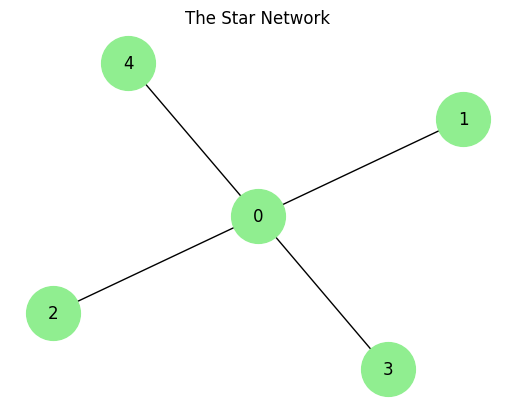

In [9]:
# THe graph of star network 
G_star=adjacency_to_networkx(star_adj_list)
plt.title('The Star Network')
nx.draw(G_star,with_labels=True,node_size=1500,node_color='lightgreen')

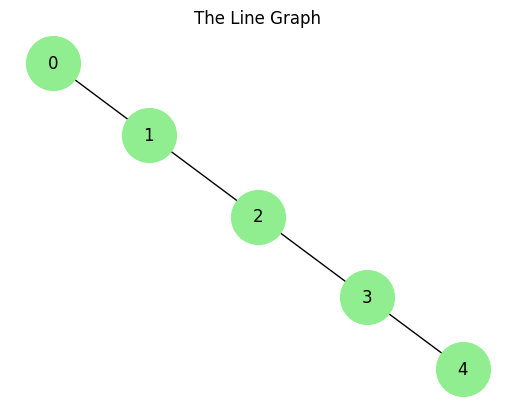

In [10]:
# The graph of line graph 
G_line=adjacency_to_networkx(line_adj_list)
plt.title('The Line Graph')
nx.draw(G_line,with_labels=True,node_size=1500,node_color='lightgreen')

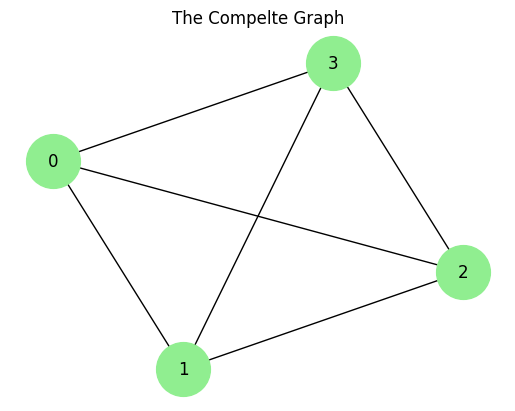

In [11]:
# THe graph of compelte graph 
G_complete=adjacency_to_networkx(complete_adj_list)
plt.title('The Compelte Graph')
nx.draw(G_complete,with_labels=True,node_size=1500,node_color='lightgreen')

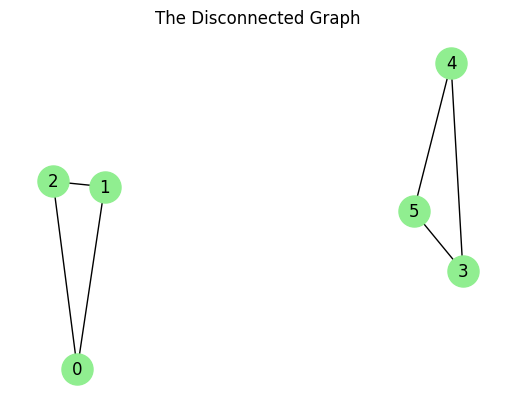

In [12]:
# The graph of disconnected graph 
G_disc=adjacency_to_networkx(disconnected_adj_list)
plt.title('The Disconnected Graph')
nx.draw(G_disc,with_labels=True,node_size=500,node_color='lightgreen')

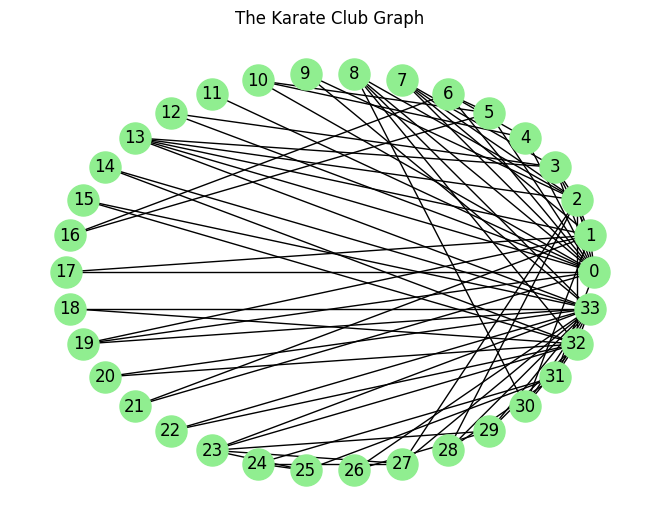

In [13]:
# THe graph of karate club 
pos=nx.circular_layout(G_kc,scale=3)
nx.draw(G_kc,pos,with_labels=True,node_size=500,node_color='lightgreen')
plt.title('The Karate Club Graph')
plt.show()

<hr style="height:3px;background-color:lightgreen">

# Bonus
### Closeness centrality for weighted graphs

In [14]:
def closeness_centrality_weighted(weighted_adj_dict, normalized=True, harmonic=False):
    """
    Closeness centrality for weighted graphs using dict-of-dicts representation
    
    Parameters:
    - weighted_adj_dict: dict[node] -> dict[neighbor] -> weight
    - normalized: whether to normalize results (0-1 range)
    - harmonic: whether to use harmonic closeness
    """
    if not weighted_adj_dict:
        return {}
    
    nodes = list(weighted_adj_dict.keys())
    n = len(nodes)
    closeness = {}
    
    for source in nodes:
        # Dijkstra's algorithm for weighted graph
        dist = {node: float('inf') for node in nodes}
        dist[source] = 0
        heap = [(0, source)]  # (distance, node)
        
        while heap:
            current_dist, current = heapq.heappop(heap)
            if current_dist > dist[current]:
                continue
                
            # Iterate through neighbors using dict-of-dicts
            for neighbor, weight in weighted_adj_dict.get(current, {}).items():
                new_dist = current_dist + weight
                if new_dist < dist[neighbor]:
                    dist[neighbor] = new_dist
                    heapq.heappush(heap, (new_dist, neighbor))
        
        # Calculate centrality
        if harmonic:
            # Harmonic Closeness Centrality
            harmonic_sum = 0
            for node, d in dist.items():
                if node != source and 0 < d < float('inf'):  # Exclude self and unreachable
                    harmonic_sum += 1.0 / d
            
            if normalized:
                closeness[source] = harmonic_sum / (n - 1)
            else:
                closeness[source] = harmonic_sum
        else:
            # Standard Closeness Centrality
            reachable_dists = [d for d in dist.values() if 0 < d < float('inf')]
            total_distance = sum(reachable_dists)
            num_reachable = len(reachable_dists)
            
            if total_distance > 0 and num_reachable > 0:
                if normalized:
                    closeness[source] = num_reachable / total_distance
                else:
                    closeness[source] = 1.0 / total_distance
            else:
                closeness[source] = 0.0
    
    return closeness

In [15]:
# Example W1: Transportation network with travel times
transportation = {
    'A': {'B': 2, 'C': 5},
    'B': {'A': 2, 'C': 3, 'D': 4},
    'C': {'A': 5, 'B': 3, 'D': 1},
    'D': {'B': 4, 'C': 1, 'E': 2},
    'E': {'D': 2}
}

print("Transportation Network")
print("=" * 40)

standard = closeness_centrality_weighted(transportation, harmonic=False)
harmonic = closeness_centrality_weighted(transportation, harmonic=True)

print("Node | Standard  | Harmonic")
print("-----|-----------|----------")
for node in sorted(standard.keys()):
    print(f"{node:4} | {standard[node]:.4f}    | {harmonic[node]:.4f}")

Transportation Network
Node | Standard  | Harmonic
-----|-----------|----------
A    | 0.1905    | 0.2479
B    | 0.2667    | 0.3125
C    | 0.3333    | 0.4667
D    | 0.3077    | 0.4792
E    | 0.2105    | 0.2812


In [16]:
# Example W2: Two disconnected weighted components
disconnected_weighted = {
    0: {1: 2, 2: 1},
    1: {0: 2, 2: 3},
    2: {0: 1, 1: 3},
    3: {4: 1, 5: 2},
    4: {3: 1, 5: 1},
    5: {3: 2, 4: 1}
}

print("\nDisconnected Weighted Graph")
print("=" * 40)

std_disc = closeness_centrality_weighted(disconnected_weighted, harmonic=False)
harm_disc = closeness_centrality_weighted(disconnected_weighted, harmonic=True)

print("Node | Standard  | Harmonic")
print("-----|-----------|----------")
for node in sorted(std_disc.keys()):
    component = "Comp1" if node < 3 else "Comp2"
    print(f"{node:4} | {std_disc[node]:.4f}    | {harm_disc[node]:.4f}  ({component})")


Disconnected Weighted Graph
Node | Standard  | Harmonic
-----|-----------|----------
   0 | 0.6667    | 0.3000  (Comp1)
   1 | 0.4000    | 0.1667  (Comp1)
   2 | 0.5000    | 0.2667  (Comp1)
   3 | 0.6667    | 0.3000  (Comp2)
   4 | 1.0000    | 0.4000  (Comp2)
   5 | 0.6667    | 0.3000  (Comp2)


<hr style="height:3px;background-color:orange">

# Extra
### Example of comparison between standard closeness and harmonic closeness

In [17]:
def mathematical_comparison():
    """Show why harmonic closeness is usually higher"""
    print("\nMATHEMATICAL COMPARISON")
    print("=" * 60)
    
    # Example distances from a node to others
    distances = [1, 2, 3, 4, 5]
    n = len(distances)
    
    standard = n / sum(distances)
    harmonic = sum(1/d for d in distances) / n
    
    print(f"Distances: {distances}")
    print(f"Standard closeness (normalized): {n} / {sum(distances)} = {standard:.4f}")
    print(f"Harmonic closeness (normalized): {sum(1/d for d in distances):.4f} / {n} = {harmonic:.4f}")
    print(f"Difference: {harmonic - standard:.4f} ({((harmonic-standard)/standard)*100:.1f}% increase)")
    
    print("\nIndividual contributions:")
    for d in distances:
        print(f"  Distance {d}: standard_weight = {1/sum(distances):.4f}, harmonic_weight = {1/d/n:.4f}")

mathematical_comparison()


MATHEMATICAL COMPARISON
Distances: [1, 2, 3, 4, 5]
Standard closeness (normalized): 5 / 15 = 0.3333
Harmonic closeness (normalized): 2.2833 / 5 = 0.4567
Difference: 0.1233 (37.0% increase)

Individual contributions:
  Distance 1: standard_weight = 0.0667, harmonic_weight = 0.2000
  Distance 2: standard_weight = 0.0667, harmonic_weight = 0.1000
  Distance 3: standard_weight = 0.0667, harmonic_weight = 0.0667
  Distance 4: standard_weight = 0.0667, harmonic_weight = 0.0500
  Distance 5: standard_weight = 0.0667, harmonic_weight = 0.0400
